In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import joblib
from abbreivations import replacement_dict

# Download NLTK resources
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\chish\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Loading the dataset to perform cleaning

In [3]:
df=pd.read_csv('labeled_data.csv')
df.shape

(24783, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB



# Removing usernames

In [5]:
# Function to remove usernames
def remove_usernames(tweet):
    return re.sub(r'@\w+', '', tweet)

# Apply the function to the DataFrame
df['tweet'] = df['tweet'].apply(remove_usernames)
df.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT : As a woman you shouldn't complain abo...
1,1,3,0,3,0,1,!!!!! RT : boy dats cold...tyga dwn bad for cu...
2,2,3,0,3,0,1,!!!!!!! RT Dawg!!!! RT : You ever fuck a bitc...
3,3,3,0,2,1,1,!!!!!!!!! RT : she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT : The shit you hear about me ...


# Removing special symbols

In [6]:
# Function to remove sequence
def remove_sequence(tweet):
    return re.sub(r'\b\d+\b', '', tweet)

# Apply the function to the DataFrame
df['tweet'] = df['tweet'].apply(remove_sequence)
df.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT : As a woman you shouldn't complain abo...
1,1,3,0,3,0,1,!!!!! RT : boy dats cold...tyga dwn bad for cu...
2,2,3,0,3,0,1,!!!!!!! RT Dawg!!!! RT : You ever fuck a bitc...
3,3,3,0,2,1,1,!!!!!!!!! RT : she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT : The shit you hear about me ...


# Removing Urls

In [7]:
# function to remove urls
def remove_urls(tweet):
    return re.sub(r'http\S+|www\S+|https\S+|@\w+|#\w+', '', tweet, flags=re.MULTILINE)
df['tweet']= df['tweet'].apply(remove_urls)

# Removing punctuations

In [8]:
df['tweet'] = df['tweet'].str.lower()
 
# Removing punctuations present in the text
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)
 
df['tweet']= df['tweet'].apply(lambda x: remove_punctuations(x))
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt as a woman you shouldnt complain about cl...
1,1,3,0,3,0,1,rt boy dats coldtyga dwn bad for cuffin dat ...
2,2,3,0,3,0,1,rt dawg rt you ever fuck a bitch and she st...
3,3,3,0,2,1,1,rt she look like a tranny
4,4,6,0,6,0,1,rt the shit you hear about me might be true ...


# Removing abbreviations

In [10]:

def replace_words(tweet, abbreviations_dict):
    # Create a regex pattern from the keys of the dictionary
    pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in abbreviations_dict.keys()) + r')\b')
    # Replace matched words with their corresponding values
    return pattern.sub(lambda x: abbreviations_dict[x.group()], tweet)

# Apply the function to your DataFrame
df['tweet'] = df['tweet'].apply(lambda x: replace_words(x.lower(), replacement_dict))
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,retweet as euro a euro woman euro you euro s...
1,1,3,0,3,0,1,retweet boy euro that is euro coldtyga euro ...
2,2,3,0,3,0,1,retweet friend euro retweet you euro ever e...
3,3,3,0,2,1,1,retweet she euro look euro like euro a euro...
4,4,6,0,6,0,1,retweet the euro shit euro you euro hear eur...


# Lemmatization

In [11]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')
    imp_words = []
 
    # Storing the important words
    for word in str(text).split():
 
        if word not in stop_words:
 
        # Let's Lemmatize the word as well
        # before appending to the imp_words list.
 
            lemmatizer = WordNetLemmatizer()
            lemmatizer.lemmatize(word)
 
            imp_words.append(word)
 
    output = " ".join(imp_words)
 
    return output
 
 
df['tweet'] = df['tweet'].apply(lambda text: remove_stopwords(text))
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,retweet euro euro woman euro euro shouldnt eur...
1,1,3,0,3,0,1,retweet boy euro euro coldtyga euro euro bad e...
2,2,3,0,3,0,1,retweet friend euro retweet euro ever euro fuc...
3,3,3,0,2,1,1,retweet euro look euro like euro euro tranny
4,4,6,0,6,0,1,retweet euro shit euro euro hear euro euro eur...


# Saving the dataset after changes

In [12]:
df.to_csv('final.csv', index=False) #save as file

# Data visualization

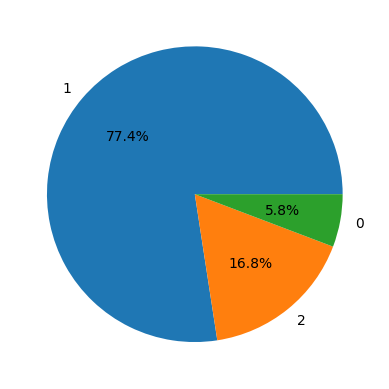

In [13]:
# class 0 - non offensive and no hate speech
# class 1 - offensive
# class 2 - hate speech
plt.pie(df['class'].value_counts().values,
		labels = df['class'].value_counts().index,
		autopct='%1.1f%%')
plt.show()


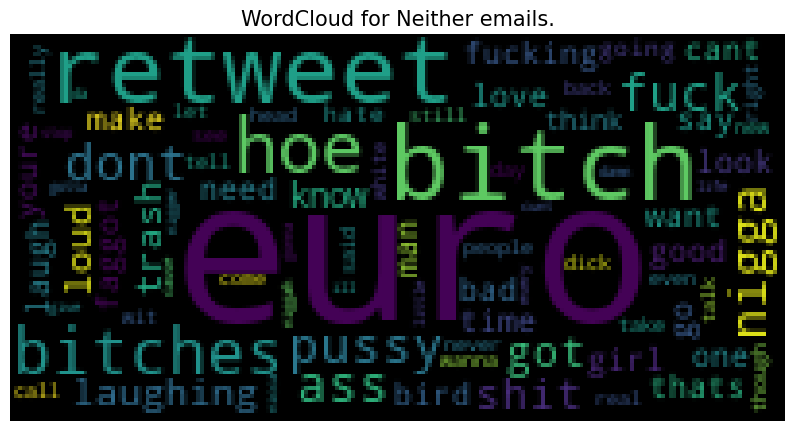

In [15]:
from wordcloud import WordCloud
def plot_word_cloud(data, typ):
# Joining all the tweets to get the corpus
    email_corpus = " ".join(df['tweet'])

    plt.figure(figsize = (10,10))

    # Forming the word cloud
    wc = WordCloud(max_words = 100,
                    width = 200,
                    height = 100,
                    collocations = False).generate(email_corpus)

    # Plotting the wordcloud obtained above
    plt.title(f'WordCloud for {typ} emails.', fontsize = 15)
    plt.axis('off')
    plt.imshow(wc)
    plt.show()
    print()

plot_word_cloud(df[df['class']==2], typ='Neither')


# Loading the dataset and mapping offensive to hate speech

In [16]:
# Load the dataset
df = pd.read_csv('final.csv')
text_column = 'tweet'

# Ensure all entries in the text column are strings
df[text_column] = df[text_column].astype(str).fillna('')

# Map offensive and hate speech to 1 (hate speech), non-offensive to 0 (normal)
label_mapping = {0: 0, 1: 1, 2: 1}
df['label'] = df['class'].map(label_mapping)



# Splitting the data

In [17]:
X = df[text_column]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Defining the Pipeline

In [18]:
pipeline = ImbPipeline([
    ('tfidf', TfidfVectorizer(max_features=4000)),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier())
])


# Hyperparameter Tuning

In [19]:
param_grid = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(pipeline, param_grid, n_iter=10, cv=3, scoring='f1', n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('tfidf',
                                              TfidfVectorizer(max_features=4000)),
                                             ('smote', SMOTE(random_state=42)),
                                             ('clf',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'clf__max_depth': [None, 10, 20, 30],
                                        'clf__min_samples_leaf': [1, 2, 4],
                                        'clf__min_samples_split': [2, 5, 10],
                                        'clf__n_estimators': [50, 100, 200]},
                   random_state=42, scoring='f1', verbose=2)

# Evaluating the Best Model

RandomForest - F1 Score: 0.9341
                 precision    recall  f1-score   support

Non-Hate Speech       0.47      0.33      0.39       290
    Hate Speech       0.96      0.98      0.97      4667

       accuracy                           0.94      4957
      macro avg       0.72      0.65      0.68      4957
   weighted avg       0.93      0.94      0.93      4957



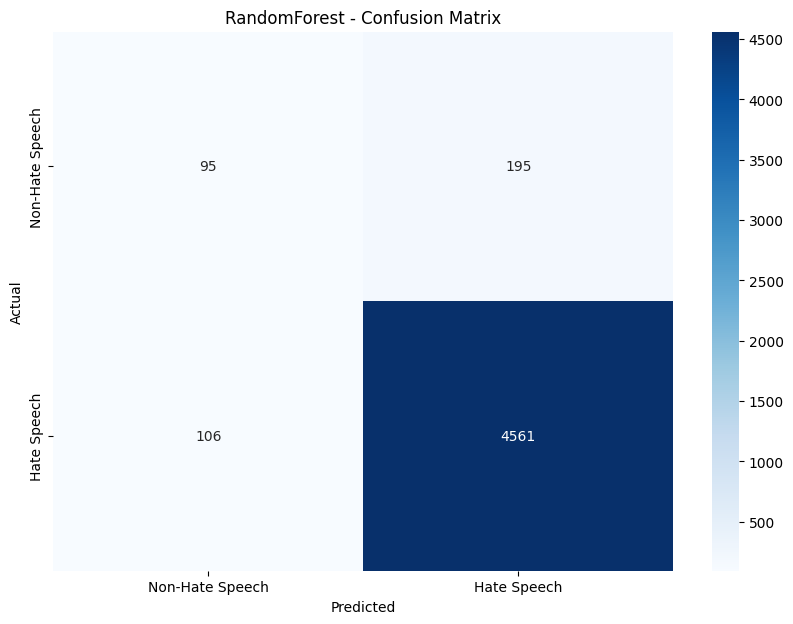

In [20]:
best_model = random_search.best_estimator_

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f'{model_name} - F1 Score: {f1_score(y_test, y_pred, average="weighted"):.4f}')
    print(classification_report(y_test, y_pred, target_names=['Non-Hate Speech', 'Hate Speech']))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hate Speech', 'Hate Speech'], yticklabels=['Non-Hate Speech', 'Hate Speech'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.savefig(f'{model_name}_confusion_matrix.png')
    plt.show()

evaluate_model(best_model, X_test, y_test, 'RandomForest')


# Making predictions


In [26]:

# Load the new data
new_df = pd.read_csv('labeled_data.csv')
new_text_column = 'tweet'
new_df[new_text_column] = new_df[new_text_column].astype(str).fillna('')
new_X = new_df[new_text_column]

# Predict using the best model pipeline (no need for explicit transformation)
new_predictions = best_model.predict(new_X)

# Map numeric labels to categorical labels
label_map = {0: 'Non-Hate Speech', 1: 'Hate Speech'}
new_df['predictions'] = [label_map[pred] for pred in new_predictions]

# Save the predictions to a CSV file
new_df.to_csv('new_data_with_predictions.csv', index=False)

# Print the predictions
print(new_df[['tweet', 'predictions']])


                                                   tweet  predictions
0      !!! RT @mayasolovely: As a woman you shouldn't...  Hate Speech
1      !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  Hate Speech
2      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  Hate Speech
3      !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  Hate Speech
4      !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  Hate Speech
...                                                  ...          ...
24778  you's a muthaf***in lie &#8220;@LifeAsKing: @2...  Hate Speech
24779  you've gone and broke the wrong heart baby, an...  Hate Speech
24780  young buck wanna eat!!.. dat nigguh like I ain...  Hate Speech
24781              youu got wild bitches tellin you lies  Hate Speech
24782  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...  Hate Speech

[24783 rows x 2 columns]
